In [238]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from scipy.optimize import minimize
from scipy.optimize import basinhopping
from scipy.optimize import differential_evolution
from scipy.optimize import least_squares

import asteval
from lmfit import Model
from lmfit import Parameters
import matplotlib.pyplot as plt
from matplotlib import cm
import math

In [239]:
#decorator for logging function calls

def call_counter(func):
    def helper(*args, **kwargs):
        helper.calls += 1
        return func(*args, **kwargs)
    helper.calls = 0
    helper.__name__= func.__name__

    return helper

In [240]:
def mserror(predicted,y):
    return np.sum((predicted-y)**2)

In [241]:
alpha = np.random.random()
betha = np.random.random()
x = np.array([(3*i)/100 for i in range(1001)])
def f(x_i):
    return 1/(x_i**2-3*x_i+2)
y = []

for x_i in x:
    if f(x_i) < -100:
        y.append(-100 + np.random.normal(0,1))
    elif f(x_i) >= -100 and f(x_i) <= 100:
        y.append(f(x_i)++np.random.normal(0,1))
    elif f(x_i) > 100:
        y.append(100+np.random.normal(0,1))

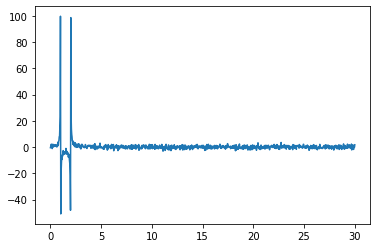

In [242]:
plt.plot(x,y)

In [243]:
# function to fit: 

def func(x,a,b,c,d):
    return (a * x + b) / (x ** 2 + c * x + d)

In [244]:
def cost(args,x,y,func):
    
    predictions = func(x,*args)
    cost = np.sum(np.square(predictions-y))
    return cost

<h1>Nelder-Mead</h1>

In [245]:
result_nelder = minimize(cost,(1,1,0.1,0.1),args=(x,y,func), method="Nelder-Mead")

In [246]:
result_nelder.x

array([-0.59022266,  0.72589399, -2.22592928,  1.22500768])

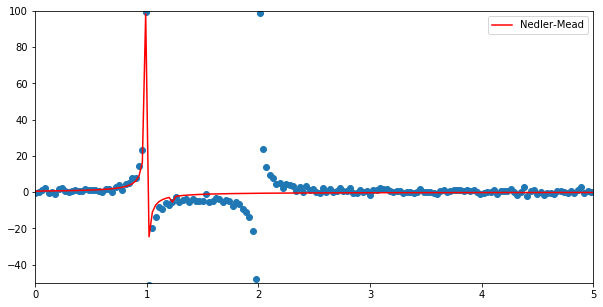

In [247]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))

ax.scatter(x, y)
ax.plot(x, func(x,*result_nelder.x), 'r-',color='red', label='Nedler-Mead')
ax.axis([0,5,-50,100])
#plt.margins(0, 3) 
ax.legend(loc='best')
plt.show()

In [248]:
result_nelder

 final_simplex: (array([[-0.59022266,  0.72589399, -2.22592928,  1.22500768],
       [-0.59022227,  0.72589393, -2.22592937,  1.2250077 ],
       [-0.5902221 ,  0.7258939 , -2.22592935,  1.22500769],
       [-0.59022292,  0.72589403, -2.22592925,  1.22500768],
       [-0.59022125,  0.72589376, -2.22592952,  1.22500772]]), array([16303.27784385, 16303.27787247, 16303.27787593, 16303.27791111,
       16303.27793333]))
           fun: 16303.27784385225
       message: 'Optimization terminated successfully.'
          nfev: 535
           nit: 294
        status: 0
       success: True
             x: array([-0.59022266,  0.72589399, -2.22592928,  1.22500768])

In [249]:
cost(result_nelder.x,x,y,func)

16303.27784385225

<h1>Simulated Annealing</h1>

In [250]:
result_bashing = basinhopping(cost, (1,1,1,1), niter=100, T=1.0, stepsize=0.05, 
                            minimizer_kwargs={"args":(x,y,func)})

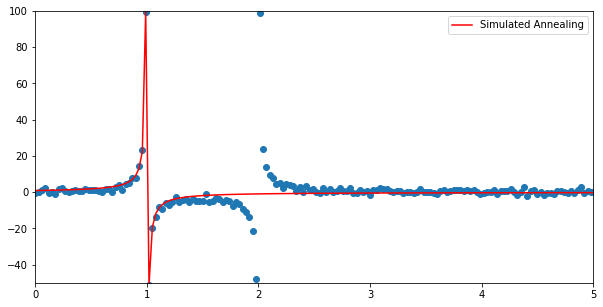

In [251]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))

ax.scatter(x, y)
ax.plot(x, func(x,*result_bashing.x), 'r-',color='red', label='Simulated Annealing')
ax.axis([0,5,-50,100])
#plt.margins(0, 3) 
ax.legend(loc='best')
plt.show()

In [252]:
result_bashing

                        fun: 15372.877859716824
 lowest_optimization_result:       fun: 15372.877859716824
 hess_inv: array([[ 1.88363146e-04, -1.87432730e-04, -2.15203748e-06,
         2.12040502e-06],
       [-1.87432730e-04,  1.86518843e-04,  2.13871970e-06,
        -2.10714783e-06],
       [-2.15203752e-06,  2.13871975e-06,  8.24422384e-08,
        -8.15304613e-08],
       [ 2.12040506e-06, -2.10714788e-06, -8.15304613e-08,
         8.06305083e-08]])
      jac: array([ -3432.91333008,  -3493.7557373 , 694511.93200684, 703113.35766602])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 700
      nit: 25
     njev: 115
   status: 2
  success: False
        x: array([-0.93197959,  0.92505016, -1.99408483,  0.99406796])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 100
                       nfev: 80103
                        nit: 100
                       njev: 1317

In [253]:
cost(result_bashing.x,x,y,func)

15372.877859716824

<h1>Levenberg-Marquardt</h1>

In [254]:
levenberg = Model(func)
print('parameter names: {}'.format(levenberg.param_names))
print('independent variables: {}'.format(levenberg.independent_vars))

params1 = Parameters()
params1.add('a', value=0, min=-1, max=1)
params1.add('b', value=0, min=-1, max=1)
params1.add('c', value=0, min=-3, max=1)
params1.add('d', value=0, min=0.1, max=1)

result_levenberg = levenberg.fit(y, params1,method="leastsq", x=x)

parameter names: ['a', 'b', 'c', 'd']
independent variables: ['x']


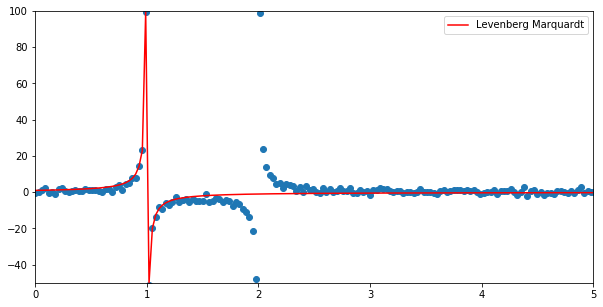

In [255]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))

ax.scatter(x, y)
ax.plot(x, result_levenberg.best_fit, 'r-',color='red', label='Levenberg Marquardt')
ax.axis([0,5,-50,100])
#plt.margins(0, 3) 
ax.legend(loc='best')
plt.show()

In [256]:
result_levenberg

In [257]:
mserror(result_levenberg.best_fit,y)

15381.618274125514

In [258]:
result_levenberg.params

name,value,standard error,relative error,initial value,min,max,vary
a,-0.99721884,0.06478939,(6.50%),0,-1.00000000,1.00000000,True
b,0.95709414,0.56747243,(59.29%),0,-1.00000000,1.00000000,True
c,-1.95977111,0.51980240,(26.52%),0,-3.00000000,1.00000000,True
d,0.95977005,0.51979738,(54.16%),0.1,0.10000000,1.00000000,True


<h1>Differential Evolution</h1>

In [259]:
result_genetic = differential_evolution(cost,bounds=((-3,3),(-3,3),(-3,3),(-3,3)),args=(x,y,func))

In [260]:
result_genetic

     fun: 15581.16332669735
     jac: array([-1.67801772,  2.11548468,  5.38693712, -6.04504748])
 message: 'Optimization terminated successfully.'
    nfev: 4120
     nit: 66
 success: True
       x: array([ 1.92173737, -0.51220431, -0.60965286, -2.78071661])

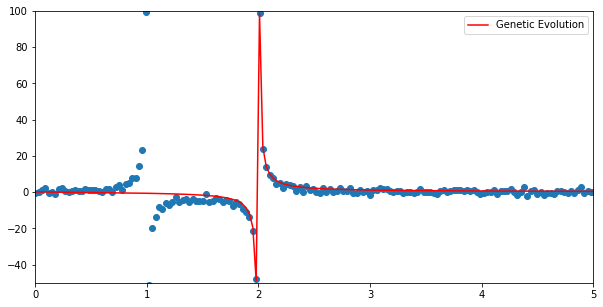

In [261]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))

ax.scatter(x, y)
ax.plot(x, func(x,*result_genetic.x), 'r-',color='red', label='Genetic Evolution')
ax.axis([0,5,-50,100])
#plt.margins(0, 3) 
ax.legend(loc='best')
plt.show()

In [262]:
cost(result_genetic.x,x,y,func)

15581.16332669735

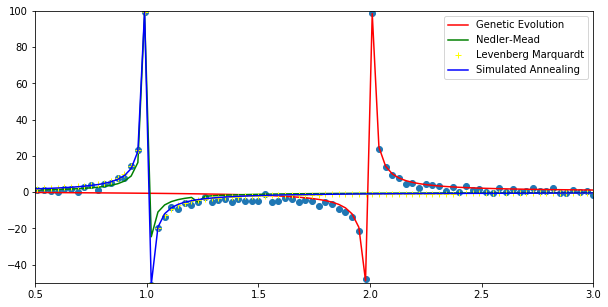

In [263]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
ax.scatter(x, y)
ax.plot(x, func(x,*result_genetic.x), 'r-',color='red', label='Genetic Evolution')
ax.plot(x, func(x,*result_nelder.x), 'r',color='green', label='Nedler-Mead')
ax.plot(x, result_levenberg.best_fit, '+',color='yellow', label='Levenberg Marquardt')
ax.plot(x, func(x,*result_bashing.x), 'r-',color='blue', label='Simulated Annealing')
ax.axis([0.5,3,-50,100])
#plt.margins(0, 2) 
ax.legend(loc='best')
plt.show()

# 